<a href="https://colab.research.google.com/github/jperez0787/Decision/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set(rc={'figure.figsize':(10,6)})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data = pd.read_csv("diabetes.csv")
target = 'Outcome'
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

#2. Análisis exploratorio (EDA)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Cantidad de valores nulos

data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Cantidad de valores NaN

data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

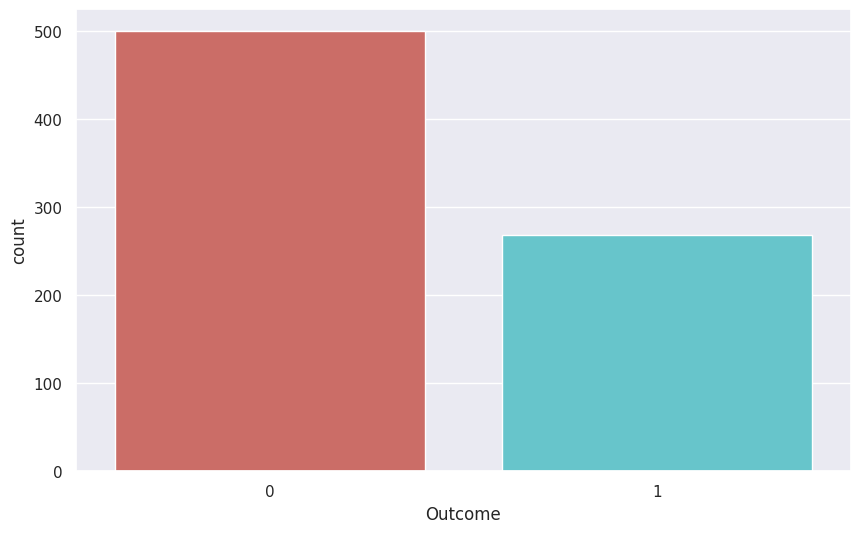

In [ ]:
sns.countplot(x='Outcome', data = data, palette = 'hls')

In [ ]:
data.Outcome.mean()

0.3489583333333333

## # Muestreo

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data,
                               stratify = data['Outcome'],
                               train_size = 0.7,
                               random_state = 123)

## # Tratamiento de variables

In [ ]:
# Analisis Univariado I

univariate = train[features].describe(percentiles = [0.05, 0.95]).transpose()
univariate.reset_index(drop = False, inplace = True)

univariate['missing_rate'] = 1 - univariate['count']/len(train)

univariate.rename(columns = {'index' : 'feature',
                             '5%': 'p5',
                             '50%' : 'median',
                             '95%': 'p95'}, inplace = True)
univariate.head()

feature  count        mean         std  min    p5  median    p95  \
0    Pregnancies  537.0    3.873371    3.441784  0.0   0.0     3.0   10.0   
1        Glucose  537.0  120.696462   32.113010  0.0  78.0   117.0  181.0   
2  BloodPressure  537.0   69.141527   19.503504  0.0  36.4    72.0   90.4   
3  SkinThickness  537.0   20.148976   15.930123  0.0   0.0    22.0   45.0   
4        Insulin  537.0   78.627561  112.901370  0.0   0.0    37.0  286.2   

     max  missing_rate  
0   17.0           0.0  
1  199.0           0.0  
2  114.0           0.0  
3   63.0           0.0  
4  846.0           0.0

In [ ]:
univariate

feature  count        mean         std     min      p5  \
0               Pregnancies  537.0    3.873371    3.441784   0.000   0.000   
1                   Glucose  537.0  120.696462   32.113010   0.000  78.000   
2             BloodPressure  537.0   69.141527   19.503504   0.000  36.400   
3             SkinThickness  537.0   20.148976   15.930123   0.000   0.000   
4                   Insulin  537.0   78.627561  112.901370   0.000   0.000   
5                       BMI  537.0   31.966480    8.365382   0.000  21.100   
6  DiabetesPedigreeFunction  537.0    0.475408    0.331440   0.078   0.141   
7                       Age  537.0   33.296089   12.018015  21.000  21.000   

    median       p95     max  missing_rate  
0    3.000   10.0000   17.00           0.0  
1  117.000  181.0000  199.00           0.0  
2   72.000   90.4000  114.00           0.0  
3   22.000   45.0000   63.00           0.0  
4   37.000  286.2000  846.00           0.0  
5   32.000   45.0400   67.10           0.0  
6    0.378    1.1556    2.42           0.0  
7   29.000   59.0000   81.00           0.0

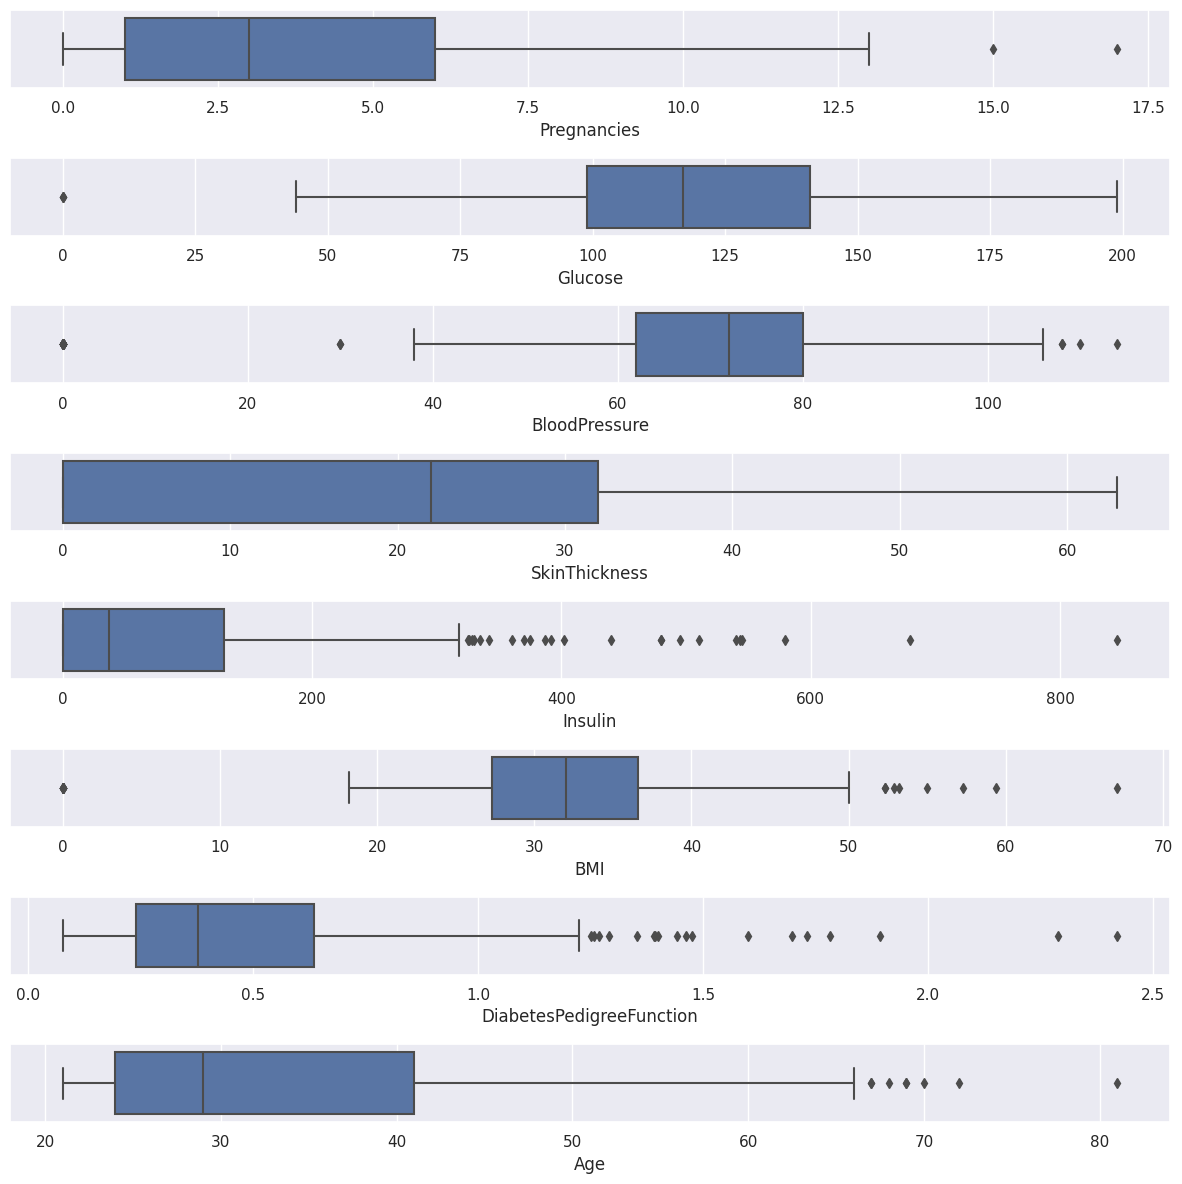

In [ ]:
# Boxplots

fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(12, 12))

sns.boxplot(x = 'Pregnancies', data=train, ax=axes[0])
sns.boxplot(x = 'Glucose', data=train, ax=axes[1])
sns.boxplot(x = 'BloodPressure', data=train, ax=axes[2])
sns.boxplot(x = 'SkinThickness', data=train, ax=axes[3])
sns.boxplot(x = 'Insulin', data=train, ax=axes[4])
sns.boxplot(x = 'BMI', data=train, ax=axes[5])
sns.boxplot(x = 'DiabetesPedigreeFunction', data=train, ax=axes[6])
sns.boxplot(x = 'Age', data=train, ax=axes[7])

plt.tight_layout()

plt.show()

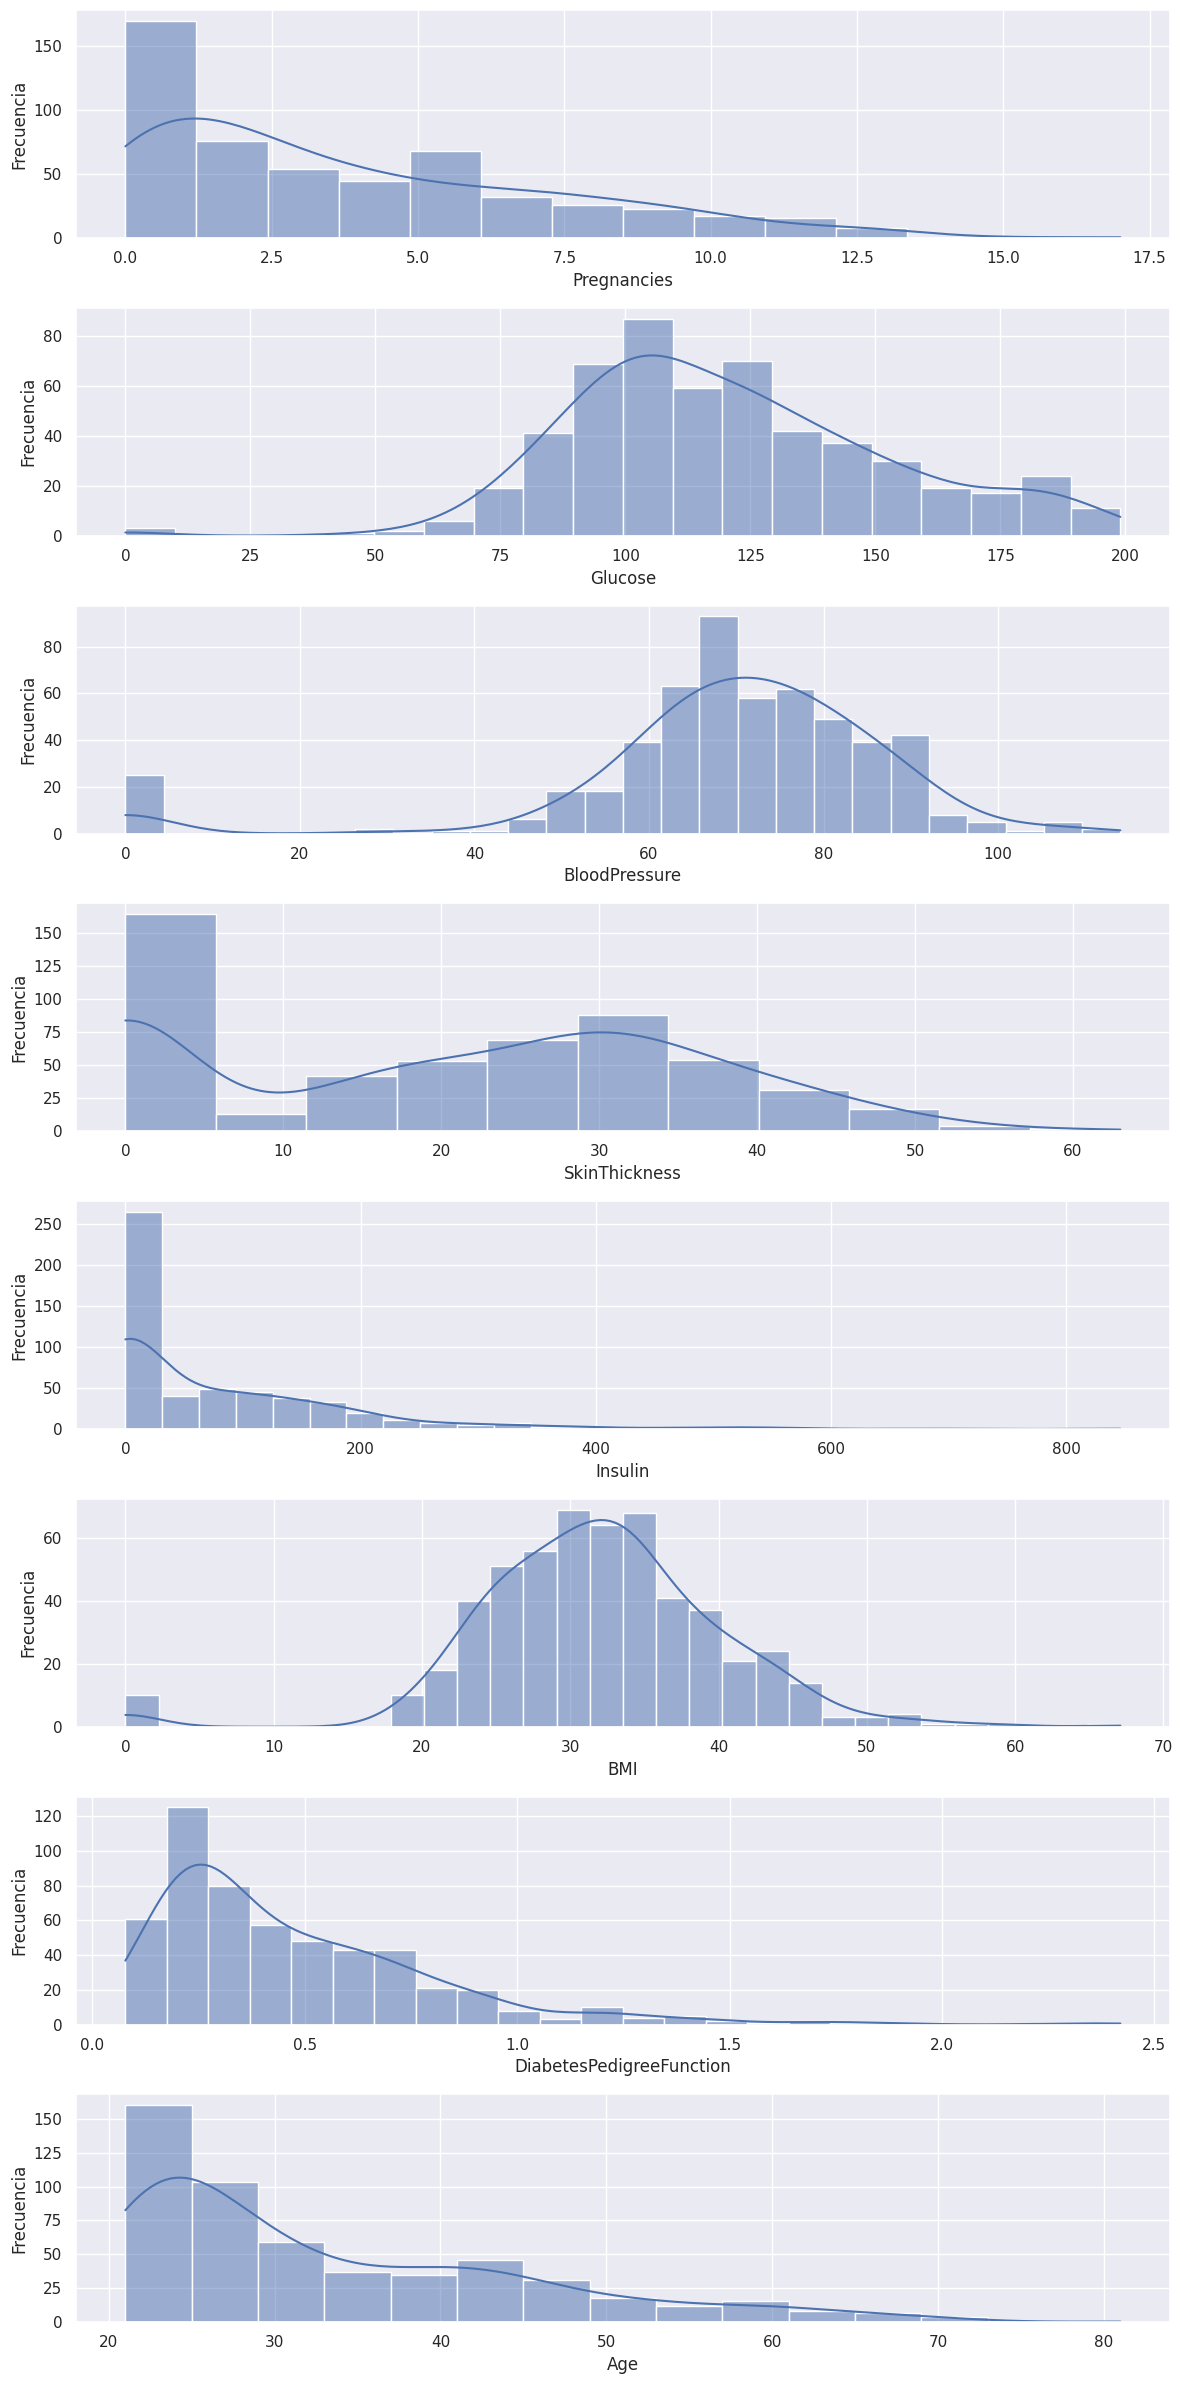

In [ ]:
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(12, 24))

variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
             'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for i, variable in enumerate(variables):
    sns.histplot(data=train, x=variable, ax=axes[i], kde=True)
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

## # Outliers

In [ ]:
univariate.feature.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
# Tratamiento de outliers por percentiles

for col in univariate.feature.tolist():
    desc = univariate.loc[univariate.feature == col]

    lower_limit = desc.p5.values[0]
    upper_limit = desc.p95.values[0]

    train[col + '_t'] = train[col].apply(lambda x: lower_limit if x <= lower_limit else
                                                    upper_limit if x >= upper_limit else
                                                    x)

    test[col + '_t'] = test[col].apply(lambda x: lower_limit if x <= lower_limit else
                                               upper_limit if x >= upper_limit else
                                               x)

In [ ]:
train.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome',
 'Pregnancies_t',
 'Glucose_t',
 'BloodPressure_t',
 'SkinThickness_t',
 'Insulin_t',
 'BMI_t',
 'DiabetesPedigreeFunction_t',
 'Age_t']

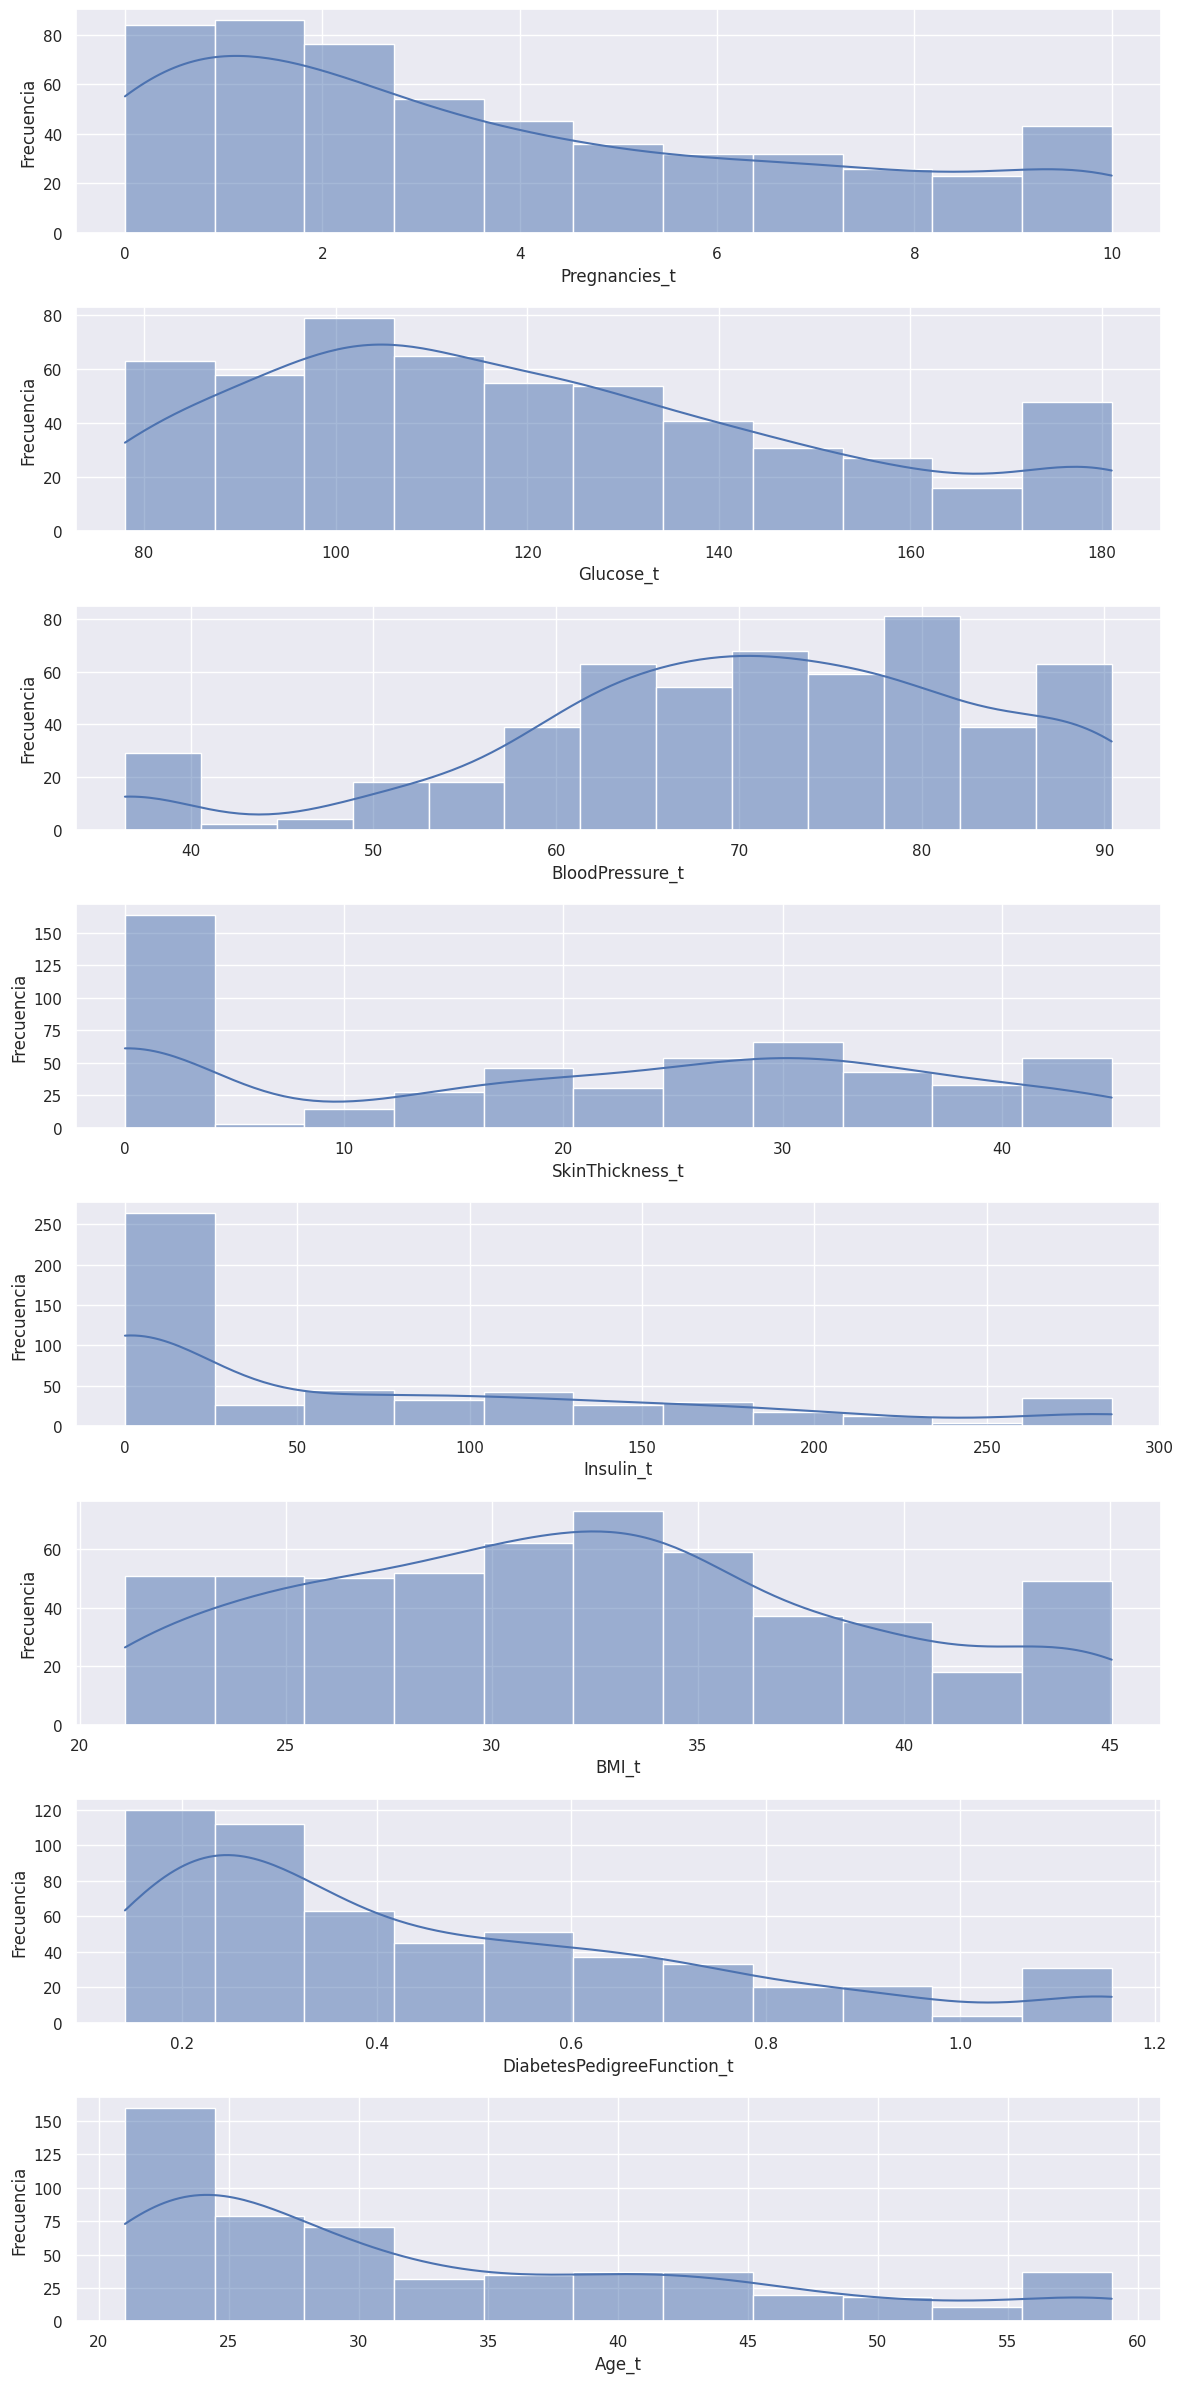

In [ ]:
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(12, 24))

variables = ['Pregnancies_t', 'Glucose_t', 'BloodPressure_t', 'SkinThickness_t',
             'Insulin_t', 'BMI_t', 'DiabetesPedigreeFunction_t', 'Age_t']

for i, variable in enumerate(variables):
    sns.histplot(data=train, x=variable, ax=axes[i], kde=True)
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

## # Preseleccion

In [ ]:
from sklearn.metrics import roc_auc_score

dfgini = pd.DataFrame({'feature': features,
                       'gini': [roc_auc_score(train.Outcome, train[col])*2-1 for col in features]})

dfgini['gini_abs'] = dfgini.gini.apply(lambda x: abs(x))

dfgini.sort_values(by = 'gini_abs', ascending = False)


feature      gini  gini_abs
1                   Glucose  0.588556  0.588556
5                       BMI  0.376165  0.376165
7                       Age  0.326646  0.326646
0               Pregnancies  0.192834  0.192834
2             BloodPressure  0.177341  0.177341
6  DiabetesPedigreeFunction  0.169748  0.169748
3             SkinThickness  0.119175  0.119175
4                   Insulin  0.059725  0.059725

In [ ]:
univariate_II = pd.merge(univariate, dfgini, on = 'feature', how = 'left')
univariate_II.sort_values(by = 'gini_abs', ascending = False)

feature  count        mean         std     min      p5  \
1                   Glucose  537.0  120.696462   32.113010   0.000  78.000   
5                       BMI  537.0   31.966480    8.365382   0.000  21.100   
7                       Age  537.0   33.296089   12.018015  21.000  21.000   
0               Pregnancies  537.0    3.873371    3.441784   0.000   0.000   
2             BloodPressure  537.0   69.141527   19.503504   0.000  36.400   
6  DiabetesPedigreeFunction  537.0    0.475408    0.331440   0.078   0.141   
3             SkinThickness  537.0   20.148976   15.930123   0.000   0.000   
4                   Insulin  537.0   78.627561  112.901370   0.000   0.000   

    median       p95     max  missing_rate      gini  gini_abs  
1  117.000  181.0000  199.00           0.0  0.588556  0.588556  
5   32.000   45.0400   67.10           0.0  0.376165  0.376165  
7   29.000   59.0000   81.00           0.0  0.326646  0.326646  
0    3.000   10.0000   17.00           0.0  0.192834  0.192834  
2   72.000   90.4000  114.00           0.0  0.177341  0.177341  
6    0.378    1.1556    2.42           0.0  0.169748  0.169748  
3   22.000   45.0000   63.00           0.0  0.119175  0.119175  
4   37.000  286.2000  846.00           0.0  0.059725  0.059725

In [ ]:
# Criterios para seleccionar variables

print('initial features: ' + str(len(univariate_II)))
print('selected features: ' + str(len(univariate_II.loc[(univariate_II.gini_abs >= 0.05) & (univariate_II.missing_rate <= 0.50)])))
final_features = univariate_II.loc[(univariate_II.gini_abs >= 0.05) & (univariate_II.missing_rate <= 0.50)].feature.tolist()

initial features: 8
selected features: 8


## # Estandarización

In [ ]:
train[[x + '_std' for x in final_features]] = (train[final_features] - train[final_features].mean())/train[final_features].std()
test[[x + '_std' for x in final_features]] = (test[final_features] - test[final_features].mean())/test[final_features].std()

## # Regresión Logística

In [ ]:
import statsmodels.api as sm

# Fit and summarize OLS model
mod = sm.Logit(train.Outcome,
               sm.add_constant(train[[x + '_std' for x in final_features]]))
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.478536
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  537
Model:                          Logit   Df Residuals:                      528
Method:                           MLE   Df Model:                            8
Date:                Wed, 12 Jul 2023   Pseudo R-squ.:                  0.2596
Time:                        15:41:23   Log-Likelihood:                -256.97
converged:                       True   LL-Null:                       -347.09
Covariance Type:            nonrobust   LLR p-value:                 9.228e-35
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.8534      0.114     -7.456      0.000

In [ ]:
features = [x + '_std' for x in final_features]
features.remove('Age_std')

mod = sm.Logit(train.Outcome, sm.add_constant(train[features]))
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.478651
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  537
Model:                          Logit   Df Residuals:                      529
Method:                           MLE   Df Model:                            7
Date:                Wed, 12 Jul 2023   Pseudo R-squ.:                  0.2594
Time:                        15:43:51   Log-Likelihood:                -257.04
converged:                       True   LL-Null:                       -347.09
Covariance Type:            nonrobust   LLR p-value:                 1.853e-35
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.8509      0.114     -7.457      0.000

In [ ]:
features.remove('SkinThickness_std')
mod = sm.Logit(train.Outcome, sm.add_constant(train[features]))
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.478828
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  537
Model:                          Logit   Df Residuals:                      530
Method:                           MLE   Df Model:                            6
Date:                Wed, 12 Jul 2023   Pseudo R-squ.:                  0.2592
Time:                        15:51:43   Log-Likelihood:                -257.13
converged:                       True   LL-Null:                       -347.09
Covariance Type:            nonrobust   LLR p-value:                 3.540e-36
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.8519      0.114     -7.466      0.000

In [ ]:
features.remove('Insulin_std')
mod = sm.Logit(train.Outcome, sm.add_constant(train[features]))
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.480887
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  537
Model:                          Logit   Df Residuals:                      531
Method:                           MLE   Df Model:                            5
Date:                Wed, 12 Jul 2023   Pseudo R-squ.:                  0.2560
Time:                        15:54:24   Log-Likelihood:                -258.24
converged:                       True   LL-Null:                       -347.09
Covariance Type:            nonrobust   LLR p-value:                 1.657e-36
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.8545      0.114     -7.501      0.000

## # Performance

In [ ]:
# Usando el modelo para predecir
train_II = train.copy()
test_II  = test.copy()

train_II['probability'] = res.predict(sm.add_constant(train[features]))
test_II['probability']  = res.predict(sm.add_constant(test[features]))

train_II['prediction'] = train_II['probability'].apply(lambda x: 1 if x > 0.5 else 0)
test_II['prediction']  = test_II['probability'].apply(lambda x: 1 if x > 0.5 else 0)

In [ ]:
test_II

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
552            6      114             88              0        0  27.8   
438            1       97             70             15        0  18.2   
149            2       90             70             17        0  27.3   
373            2      105             58             40       94  34.9   
36            11      138             76              0        0  33.2   
..           ...      ...            ...            ...      ...   ...   
85             2      110             74             29      125  32.4   
7             10      115              0              0        0  35.3   
298           14      100             78             25      184  36.6   
341            1       95             74             21       73  25.9   
472            0      119             66             27        0  38.8   

     DiabetesPedigreeFunction  Age  Outcome  Pregnancies_t  ...  \
552                     0.247   66        0            6.0  ...   
438                     0.147   21        0            1.0  ...   
149                     0.085   22        0            2.0  ...   
373                     0.225   25        0            2.0  ...   
36                      0.420   35        0           10.0  ...   
..                        ...  ...      ...            ...  ...   
85                      0.698   27        0            2.0  ...   
7                       0.134   29        0           10.0  ...   
298                     0.412   46        1           10.0  ...   
341                     0.673   36        0            1.0  ...   
472                     0.259   22        0            0.0  ...   

     Pregnancies_std  Glucose_std  BloodPressure_std  SkinThickness_std  \
552         0.693620    -0.231957           0.996255          -1.339681   
438        -0.868038    -0.768093           0.051358          -0.402283   
149        -0.555707    -0.988855           0.051358          -0.277297   
373        -0.555707    -0.515794          -0.578573           1.160047   
36          2.255278     0.524941           0.366324          -1.339681   
..               ...          ...                ...                ...   
85         -0.555707    -0.358107           0.261335           0.472622   
7           1.942946    -0.200420          -3.623242          -1.339681   
298         3.192272    -0.673481           0.471312           0.222649   
341        -0.868038    -0.831168           0.261335          -0.027324   
472        -1.180370    -0.074270          -0.158619           0.347635   

     Insulin_std   BMI_std  DiabetesPedigreeFunction_std   Age_std  \
552    -0.683586 -0.639736                     -0.653313  2.946308   
438    -0.683586 -2.083683                     -0.954842 -1.085135   
149    -0.683586 -0.714941                     -1.141790 -0.995547   
373     0.095063  0.428183                     -0.719650 -0.726784   
36     -0.683586  0.172484                     -0.131668  0.169092   
..           ...       ...                           ...       ...   
85      0.351851  0.052156                      0.706583 -0.547609   
7      -0.683586  0.488348                     -0.994041 -0.368434   
298     0.840578  0.683882                     -0.155790  1.154556   
341    -0.078890 -0.925517                      0.631201  0.258679   
472    -0.683586  1.014787                     -0.617130 -0.995547   

     probability  prediction  
552     0.164307           0  
438     0.023959           0  
149     0.050276           0  
373     0.196762           0  
36      0.660553           1  
..           ...         ...  
85      0.208223           0  
7       0.650018           1  
298     0.512644           1  
341     0.064999           0  
472     0.299500           0  

[231 rows x 27 columns]

In [ ]:
# AUC

print('TRAIN AUC: %f' %(roc_auc_score(train.Outcome, train_II.probability)))
print('TEST AUC: %f' %(roc_auc_score(test.Outcome, test_II.probability)))

TRAIN AUC: 0.826784
TEST AUC: 0.860082


In [ ]:
# GINI

print('TRAIN GINI: %f' %(roc_auc_score(train.Outcome, train_II.probability)*2-1))
print('TEST GINI: %f' %(roc_auc_score(test.Outcome, test_II.probability)*2-1))

TRAIN GINI: 0.653568
TEST GINI: 0.720165


In [ ]:
# ACCURACY
from sklearn.metrics import accuracy_score

print('TRAIN ACCURACY: %f' %(accuracy_score(train.Outcome, train_II.prediction)))
print('TEST ACCURACY: %f' %(accuracy_score(test.Outcome, test_II.prediction)))

TRAIN ACCURACY: 0.780261
TEST ACCURACY: 0.757576


In [ ]:
# PRECISION
from sklearn.metrics import precision_score

print('TRAIN PRECISION: %f' %(precision_score(train.Outcome, train_II.prediction)))
print('TEST PRECISION: %f' %(precision_score(test.Outcome, test_II.prediction)))

TRAIN PRECISION: 0.737931
TEST PRECISION: 0.698413


In [ ]:
# RECALL
from sklearn.metrics import recall_score

print('TRAIN RECALL: %f' %(recall_score(train.Outcome, train_II.prediction)))
print('TEST RECALL: %f' %(recall_score(test.Outcome, test_II.prediction)))

TRAIN RECALL: 0.572193
TEST RECALL: 0.543210


In [ ]:
# F1-SCORE
from sklearn.metrics import f1_score

print('TRAIN F1-SCORE: %f' %(f1_score(train.Outcome, train_II.prediction)))
print('TEST F1-SCORE: %f' %(f1_score(test.Outcome, test_II.prediction)))

TRAIN F1-SCORE: 0.644578
TEST F1-SCORE: 0.611111


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train.Outcome, train_II.prediction)

array([[312,  38],
       [ 80, 107]])

In [ ]:
confusion_matrix(test.Outcome, test_II.prediction)

array([[131,  19],
       [ 37,  44]])

In [ ]:
"""
####################
# Resumen MODELO 1 #
####################

# Features
Pregnancies_std
Glucose_std
BloodPressure_std
BMI_std
DiabetesPedigreeFunction_std

===============================================

TRAIN AUC: 0.826784
TEST AUC: 0.860082

===============================================

TRAIN GINI: 0.653568
TEST GINI: 0.720165

===============================================

TRAIN ACCURACY: 0.780261
TEST ACCURACY: 0.757576

===============================================

TRAIN PRECISION: 0.737931
TEST PRECISION: 0.698413

===============================================

TRAIN RECALL: 0.572193
TEST RECALL: 0.543210

===============================================

TRAIN F1-SCORE: 0.644578
TEST F1-SCORE: 0.611111

===============================================

TRAIN
array([[312,  38],
       [ 80, 107]])

TEST
array([[131,  19],
       [ 37,  44]])

####################
# Resumen MODELO 1 #
####################

"""

' \n\n# Resumen \n\n# Features \nPregnancies_std\nGlucose_std\nBloodPressure_std\nBMI_std\nDiabetesPedigreeFunction_std\n\n===============================================\n\nTRAIN AUC: 0.826784\nTEST AUC: 0.860082\n\n===============================================\n\nTRAIN GINI: 0.653568\nTEST GINI: 0.720165\n\n===============================================\n\nTRAIN ACCURACY: 0.780261\nTEST ACCURACY: 0.757576\n\n===============================================\n\nTRAIN PRECISION: 0.737931\nTEST PRECISION: 0.698413\n\n===============================================\n\nTRAIN RECALL: 0.572193\nTEST RECALL: 0.543210\n\n===============================================\n\nTRAIN F1-SCORE: 0.644578\nTEST F1-SCORE: 0.611111\n\n===============================================\n\nTRAIN\narray([[312,  38],\n       [ 80, 107]])\n\nTEST\narray([[131,  19],\n       [ 37,  44]])\n\n'

##Profiling

In [ ]:
pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 54.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=5c8c3afe83e4a2565a8e27a34d34c8ecc8903b085088f8f7ed2be993c24bc640
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordcloud-1.8.2.2:
      Successfully uninstalled wordcloud-1.8.2.2


In [ ]:
from pandas_profiling import ydata_profiling

In [ ]:
data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### ÁRBOLES

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

In [2]:
data = pd.read_csv('diabetes.csv')

In [4]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
max_depth = 3

In [21]:
min_samples_split = 30

In [22]:
model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)

In [23]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=30)

In [24]:
predictions = model.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test, predictions)

In [26]:
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.7597402597402597


In [27]:
class_names = ['No diabetes', 'Diabetes']
feature_names = X.columns

In [31]:
print("\nResultados de la clasificación:")
for i, prediction in enumerate(predictions[:10]):
    print("Paciente {}: Predicción = {}, Etiqueta real = {}".format(i+1, class_names[prediction], class_names[y_test.iloc[i]]))


Resultados de la clasificación:
Paciente 1: Predicción = No diabetes, Etiqueta real = No diabetes
Paciente 2: Predicción = No diabetes, Etiqueta real = No diabetes
Paciente 3: Predicción = No diabetes, Etiqueta real = No diabetes
Paciente 4: Predicción = No diabetes, Etiqueta real = No diabetes
Paciente 5: Predicción = No diabetes, Etiqueta real = No diabetes
Paciente 6: Predicción = No diabetes, Etiqueta real = No diabetes
Paciente 7: Predicción = No diabetes, Etiqueta real = No diabetes
Paciente 8: Predicción = No diabetes, Etiqueta real = No diabetes
Paciente 9: Predicción = Diabetes, Etiqueta real = No diabetes
Paciente 10: Predicción = Diabetes, Etiqueta real = No diabetes


In [29]:
print("\nCaracterísticas utilizadas:")
for feature in feature_names:
    print("- {}".format(feature))


Características utilizadas:
- Pregnancies
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI
- DiabetesPedigreeFunction
- Age


In [33]:
feature_importance = model.feature_importances_
feature_names = X.columns

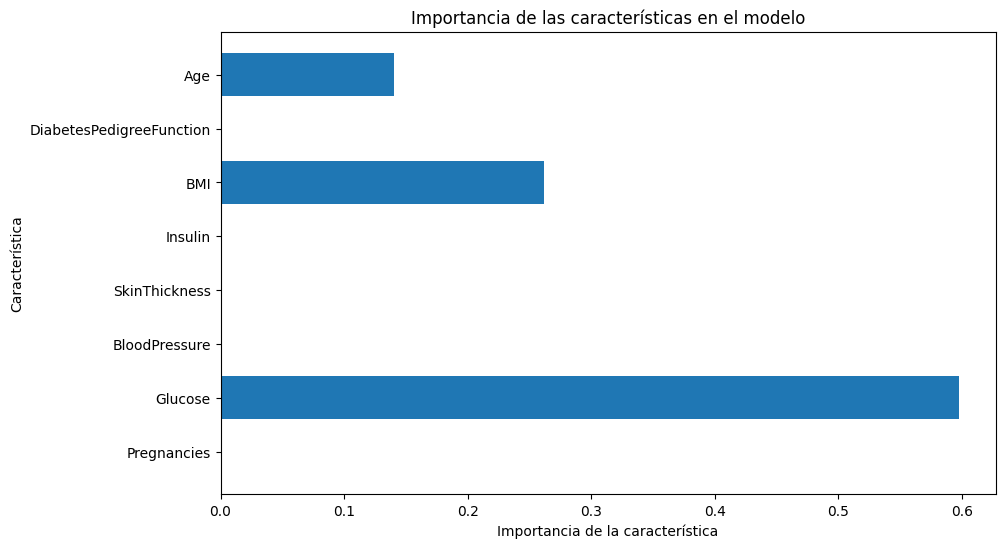

In [34]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel("Importancia de la característica")
plt.ylabel("Característica")
plt.title("Importancia de las características en el modelo")
plt.show()

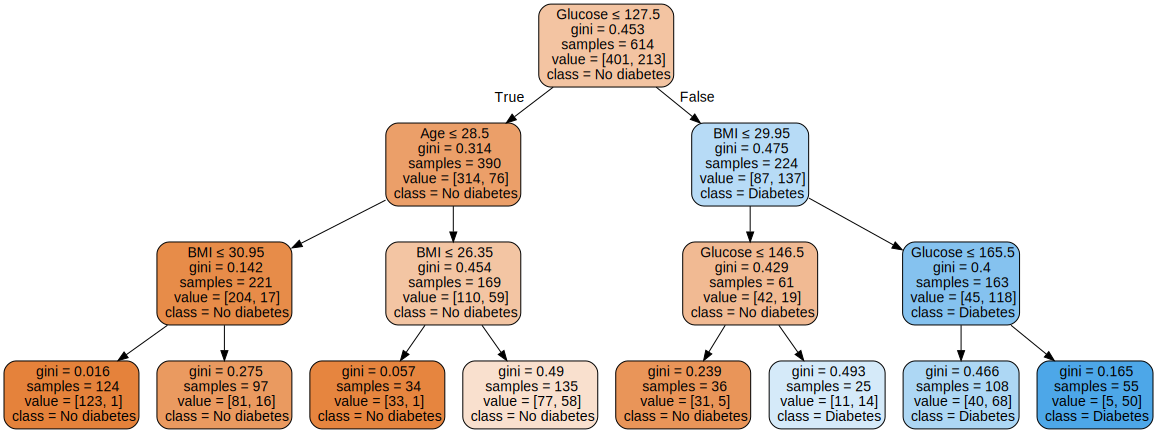

In [38]:
dot_data = export_graphviz(model, out_file=None, feature_names=X.columns, class_names=['No diabetes', 'Diabetes'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('diabetes_tree', format='png', cleanup=True)
graph

### KNN